In [ ]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
file_ = 'data/tips.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    tips = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/tips.csv
    tips = pd.read_csv(file_)

N, P = tips.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabe df = ", type(tips))
tips

--2023-11-14 00:10:47--  https://raw.githubusercontent.com/taudataanalytics/eLearning/master/data/tips.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9729 (9.5K) [text/plain]
Saving to: ‘data/tips.csv’

tips.csv            100%[===================>]   9.50K  --.-KB/s    in 0s      

2023-11-14 00:10:47 (33.9 MB/s) - ‘data/tips.csv’ saved [9729/9729]

baris =  244 , Kolom (jumlah variabel) =  7
Tipe Variabe df =  <class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tips.head().transpose()

,0,1,2,3,4
total_bill,16.99,10.34,21.01,23.68,24.59
tip,1.01,1.66,3.5,3.31,3.61
sex,Female,Male,Male,Male,Female
smoker,No,No,No,No,No
day,Sun,Sun,Sun,Sun,Sun
time,Dinner,Dinner,Dinner,Dinner,Dinner
size,2,3,3,2,4


In [ ]:
tips.tail(7)

,total_bill,tip,sex,smoker,day,time,size
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [ ]:
# chosen at random
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
91,22.49,3.50,Male,No,Fri,Dinner,2
212,48.33,9.00,Male,No,Sat,Dinner,4
139,13.16,2.75,Female,No,Thur,Lunch,2
132,11.17,1.50,Female,No,Thur,Lunch,2
0,16.99,1.01,Female,No,Sun,Dinner,2
206,26.59,3.41,Male,Yes,Sat,Dinner,3
216,28.15,3.00,Male,Yes,Sat,Dinner,5
203,16.40,2.50,Female,Yes,Thur,Lunch,2
163,13.81,2.00,Male,No,Sun,Dinner,2
140,17.47,3.50,Female,No,Thur,Lunch,2


In [ ]:
# perhatikan perintahnya tidak menggunakan tanda "()" ==> Properties
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [ ]:
def preprocess_inputs(tips):
    tips = tips.copy()

    # Binary encoding
    tips['sex'] = tips['sex'].replace({'Female': 0, 'Male': 1})
    tips['smoker'] = tips['smoker'].replace({'No': 0, 'Yes': 1})
    tips['time'] = tips['time'].replace({'Lunch': 0, 'Dinner': 1})

    # Ordinal encoding
    tips['day'] = tips['day'].replace({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})

    return tips

In [ ]:
# atau bisa juga
dummy_df = pd.get_dummies(drop_col) #convert categorical data into a numerical data
dummy_df

In [ ]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
tips['sex'] = tips['sex'].astype('category')
tips['smoker'] = tips['smoker'].astype('category')
tips['time'] = tips['time'].astype('category')
tips['day'] = tips['day'].astype('category')
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
import numpy as np
y = np.mean(tips['tip'])
y

2.99827868852459

In [ ]:
# Assuming 'data' is your DataFrame
grouped_data = tips.groupby('sex')['tip'].mean()

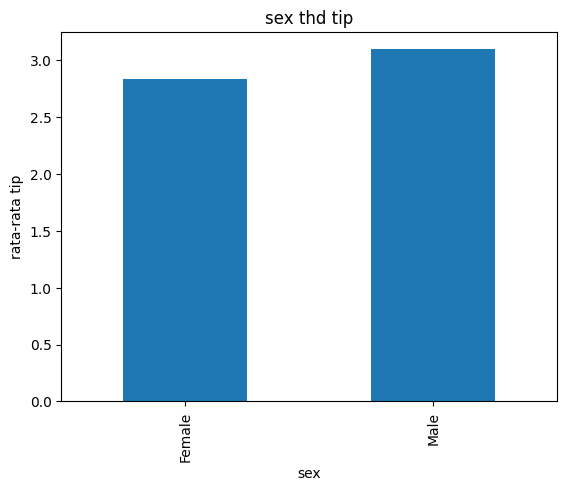

In [ ]:
# Visual Python: Library > Pandas Plot
grouped_data.plot(kind='bar', title='sex thd tip', xlabel='sex', ylabel='rata-rata tip')
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame
grouped_data1 = tips.groupby('smoker')['total_bill'].mean()

In [ ]:
# Jika yang dibutuhkan memang hanya nama kolom, maka kita bisa melakukan hal ini untuk menghemat penggunaan memory
numVar = tips.select_dtypes(include = ['float64', 'int64']).columns

numVar.to_list()

['total_bill', 'tip', 'size']

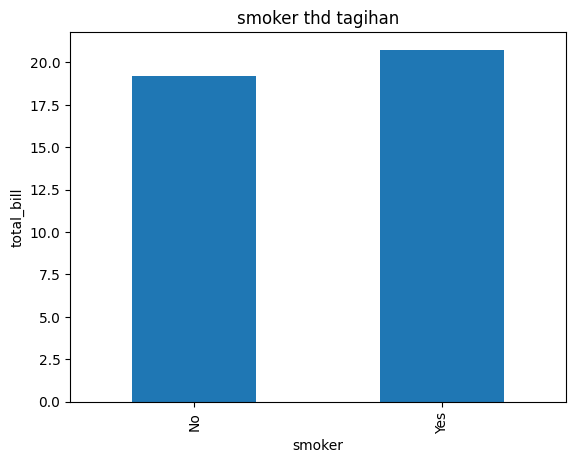

In [ ]:
# Visual Python: Library > Pandas Plot
grouped_data1.plot(kind='bar', title='smoker thd tagihan', xlabel='smoker', ylabel='total_bill')
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame
grouped_data2 = tips.groupby('smoker')['tip'].mean()

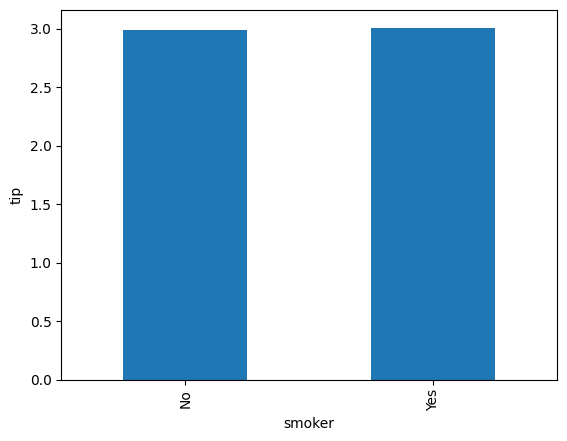

In [ ]:
# Visual Python: Library > Pandas Plot
grouped_data2.plot(kind='bar', xlabel='smoker', ylabel='tip')
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame
grouped_data3 = tips.groupby('day')['total_bill'].mean()

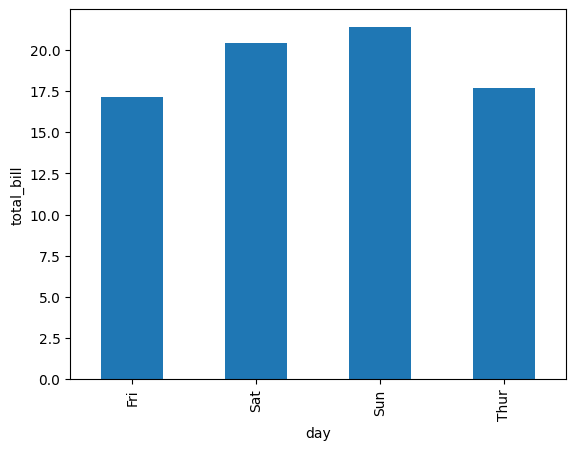

In [ ]:
# Visual Python: Library > Pandas Plot
grouped_data3.plot(kind='bar', xlabel='day', ylabel='total_bill')
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame
grouped_data4 = tips.groupby('day')['tip'].mean()

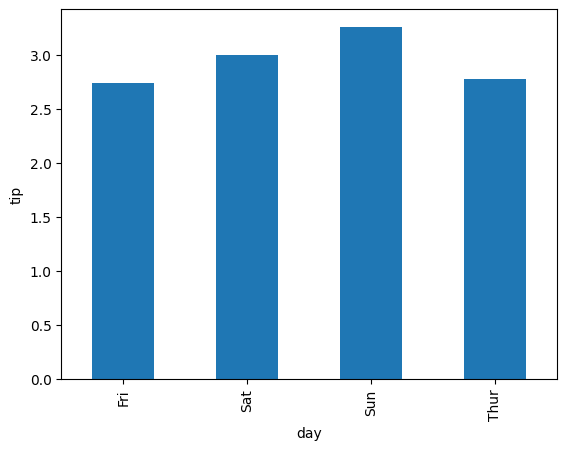

In [ ]:
# Visual Python: Library > Pandas Plot
grouped_data4.plot(kind='bar', xlabel='day', ylabel='tip')
plt.show()

In [ ]:
# Memilih hanya variable dengan tipe tertentu
numVar = tips.select_dtypes(include = ['float64', 'int64'])
numVar.head() # Perhatikan numVar adalah variable df baru! (hati-hati di data yang besar)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [ ]:
# Memilih hanya variable dengan tipe tertentu
catVar = tips.select_dtypes(include = ['object', 'category'])
catVar.head(3)

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner


In [ ]:
# get all unique values of a variable/column
for col in catVar.columns:
    print(col,': ', set(tips[col].unique()))


sex :  {'Male', 'Female'}
smoker :  {'Yes', 'No'}
day :  {'Thur', 'Fri', 'Sat', 'Sun'}
time :  {'Lunch', 'Dinner'}


In [ ]:
# Choosing some columns manually
X = tips[['total_bill','tip']] # perhatikan ada 2 tanda kurung siku "[[]]"
X.head(3)

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [ ]:
# Slicing DataFrame - Just like query in SQL
tips[tips["time"] == "Dinner"].drop("time", axis=1).head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [ ]:
# Slicing DataFrame - Just like query in SQL
X = tips[tips["smoker"].isin(["Yes","No"])]
X = X[X["time"] == "Dinner"].drop("time", axis=1)
X

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4
...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,3
240,27.18,2.00,Female,Yes,Sat,2
241,22.67,2.00,Male,Yes,Sat,2
242,17.82,1.75,Male,No,Sat,2


In [ ]:
# pengaruh jenis kelamin terhadap tip
# Choosing some columns manually
X = tips[['sex','tip']] # perhatikan ada 2 tanda kurung siku "[[]]"
X

,sex,tip
0,Female,1.01
1,Male,1.66
2,Male,3.50
3,Male,3.31
4,Female,3.61
...,...,...
239,Male,5.92
240,Female,2.00
241,Male,2.00
242,Male,1.75


### Descriptive statistics

,total_bill,tip,size
N Total,244.000,244.000,244.000
N Valid,244.000,244.000,244.000
N Missing,0.000,0.000,0.000
Mean,19.786,2.998,2.570
Median,17.795,2.900,2.000
Sum,4827.770,731.580,627.000
Minimun,3.070,1.000,1.000
Maximum,50.810,10.000,6.000
Range,47.740,9.000,5.000
Std. deviation,8.902,1.384,0.951


### Frequency table

,Frequency,Percent,Valid percent,Cumulative percent
"(3.021, 7.844]",7.0,2.87,2.87,2.87
"(7.844, 12.618]",42.0,17.21,17.21,20.08
"(12.618, 17.392]",68.0,27.87,27.87,47.95
"(17.392, 22.166]",51.0,20.90,20.90,68.85
"(22.166, 26.94]",31.0,12.70,12.70,81.55
"(26.94, 31.714]",19.0,7.79,7.79,89.34
"(31.714, 36.488]",12.0,4.92,4.92,94.26
"(36.488, 41.262]",7.0,2.87,2.87,97.13
"(41.262, 46.036]",3.0,1.23,1.23,98.36
"(46.036, 50.81]",4.0,1.64,1.64,100.00


,Frequency,Percent,Valid percent,Cumulative percent
"(0.99, 1.9]",41.0,16.80,16.80,16.80
"(1.9, 2.8]",79.0,32.38,32.38,49.18
"(2.8, 3.7]",66.0,27.05,27.05,76.23
"(3.7, 4.6]",27.0,11.07,11.07,87.30
"(4.6, 5.5]",19.0,7.79,7.79,95.09
"(5.5, 6.4]",5.0,2.05,2.05,97.14
"(6.4, 7.3]",4.0,1.64,1.64,98.78
"(7.3, 8.2]",1.0,0.41,0.41,99.19
"(8.2, 9.1]",1.0,0.41,0.41,99.60
"(9.1, 10.0]",1.0,0.41,0.41,100.01


,Frequency,Percent,Valid percent,Cumulative percent
2,156.0,63.93,63.93,63.93
3,38.0,15.57,15.57,79.50
4,37.0,15.16,15.16,94.66
1,4.0,1.64,1.64,96.30
6,4.0,1.64,1.64,97.94
5,5.0,2.05,2.05,99.99
N Valid,244.0,99.99,99.99,NaN
N Missing,0.0,NaN,NaN,NaN
N Total,244.0,NaN,NaN,NaN


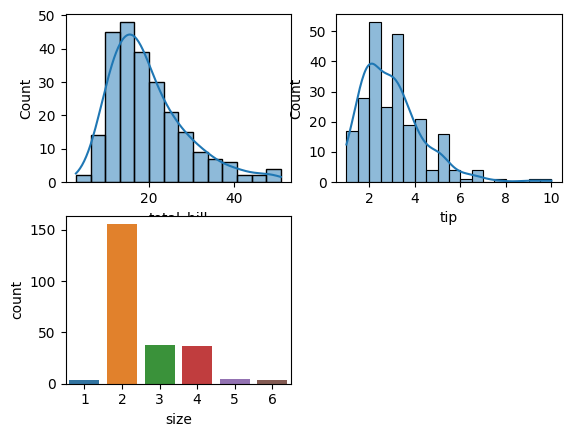

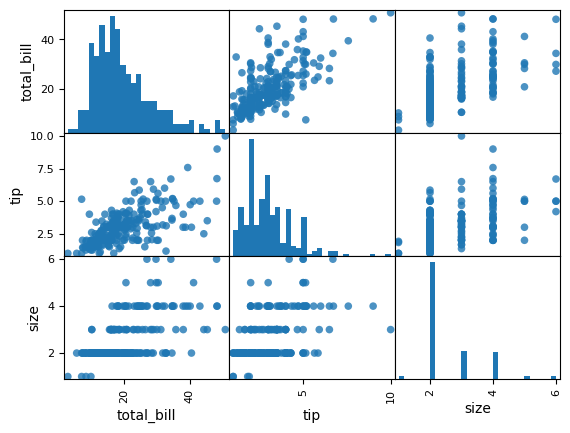

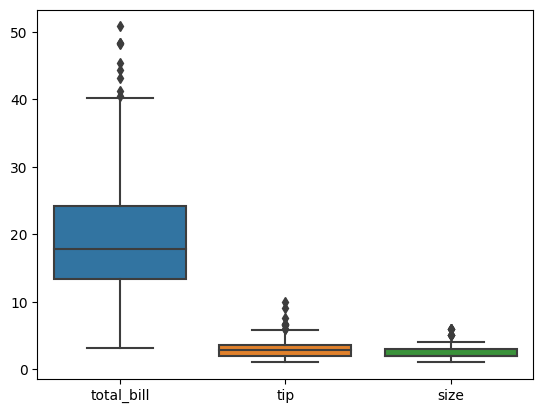

In [ ]:
# Visual Python: Descriptive Statistics
vp_df = tips[['total_bill', 'tip', 'size']].copy()

# Descriptive statistics
from IPython.display import display, Markdown
display(Markdown('### Descriptive statistics'))
display(pd.DataFrame({
    'N Total':vp_df.shape[0],
    'N Valid':vp_df.count(numeric_only=True),
    'N Missing':vp_df.loc[:,vp_df.apply(pd.api.types.is_numeric_dtype)].isnull().sum(),
    'Mean':vp_df.mean(numeric_only=True),
    'Median':vp_df.median(numeric_only=True),
    'Sum':vp_df.sum(numeric_only=True),
    'Minimun':vp_df.min(numeric_only=True),
    'Maximum':vp_df.max(numeric_only=True),
    'Range':vp_df.max(numeric_only=True) - vp_df.min(numeric_only=True),
    'Std. deviation':vp_df.std(numeric_only=True),
    'Percentile: 25':vp_df.quantile(q=0.25, numeric_only=True),
    'Percentile: 50':vp_df.quantile(q=0.50, numeric_only=True),
    'Percentile: 75':vp_df.quantile(q=0.75, numeric_only=True),
}).round(3).T)

# Frequency table
display(Markdown('### Frequency table'))
for col in vp_df.columns:
    if pd.api.types.is_numeric_dtype(vp_df[col]) and  vp_df[col].value_counts().size > 10:
        _bins = 10
    else: _bins = None

    _dfr = pd.DataFrame({
              'Frequency':vp_df[col].value_counts(bins=_bins, sort=False),
              'Percent':100*(vp_df[col].value_counts(bins=_bins, sort=False) / vp_df[col].size),
              'Valid percent':100*(vp_df[col].value_counts(bins=_bins, sort=False)/vp_df[col].count())
}).round(2)
    _dfr['Cumulative percent'] = _dfr['Valid percent'].cumsum()
    _dfr.loc['N Valid',:] =  _dfr.iloc[:,:3].sum()
    _dfr.loc['N Missing','Frequency'] =  vp_df[col].isnull().sum()
    _dfr.loc['N Total','Frequency'] =  vp_df[col].size
    display(_dfr)

# Charts
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    # Histogram
    idx = 1
    for col in vp_df.columns:
        plt.subplot(2,2, idx)
        if pd.api.types.is_numeric_dtype(vp_df[col]) and  vp_df[col].value_counts().size > 10:
            sns.histplot(data=vp_df, x=col, kde=True)
        else:
            sns.countplot(data=vp_df, x=col)

        if idx < 4:
            idx += 1
        else:
            idx = 1
            plt.tight_layout()
            plt.show()

    # Scatter matrix
    pd.plotting.scatter_matrix(vp_df, marker='o', hist_kwds={'bins': 30}, s=30, alpha=.8)
    plt.show()

    # Boxplot
    sns.boxplot(vp_df)
    plt.show()

In [ ]:
# Visual Python: Correlation Analysis
def vp_confidence_interval_corr(x, y, method='pearson', alpha=0.05):
    try: x=pd.Series(x); y=pd.Series(y)
    except: return np.nan

    corr_func = {'pearson':stats.pearsonr,'spearman':stats.spearmanr,'kendall':stats.kendalltau}
    se_diff   = {'pearson':3,'spearman':3,'kendall':4}
    se_func   = {'pearson': lambda corr: 1,
                 'spearman':lambda corr: 1 + corr ** 2 / 2.,
                 'kendall': lambda corr: .437 }

    corr, pvalue = corr_func[method](x,y)

    z  = np.log((1 + corr) / (1 - corr)) / 2
    se = np.sqrt(se_func[method](corr) / (x.size - se_diff[method]))

    z_lower = z - stats.norm.ppf(1 - alpha / 2.) * se
    z_upper = z + stats.norm.ppf(1 - alpha / 2.) * se

    corr_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
    corr_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

    return corr, pvalue, corr_lower, corr_upper

### Correlation Analysis: Pearson

,Variable1,Variable2,N,Correlation coefficient,p-value,Lower(95%),Upper(95%)
0,total_bill,tip,244,0.675734,6.692471e-34,0.601165,0.738637


,total_bill,tip
total_bill,1.00,0.68
tip,0.68,1.00


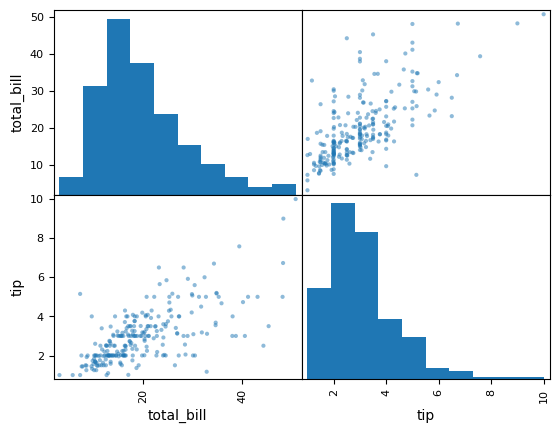

In [ ]:
# Visual Python: Correlation Analysis
vp_df = tips[['total_bill', 'tip']].dropna().copy()

# Correlation Analysis
from scipy import stats
from IPython.display import display, Markdown
_dfr = pd.DataFrame()
for i, col1 in enumerate(vp_df.columns):
    for j, col2 in enumerate(vp_df.columns):
        if i >= j: continue
        if pd.api.types.is_numeric_dtype(vp_df[col1]) and pd.api.types.is_numeric_dtype(vp_df[col2]):
            _res = vp_confidence_interval_corr(vp_df[col1], vp_df[col2], method='pearson')
            _df_t = pd.DataFrame(data={'Variable1':col1,'Variable2':col2,'N':vp_df[col1].size,'Correlation coefficient':_res[0],
                                   'p-value':_res[1],'Lower(95%)':_res[2],'Upper(95%)':_res[3]}, index=[0])
            _dfr = pd.concat([_dfr, _df_t]).reset_index(drop=True)
display(Markdown('### Correlation Analysis: Pearson'))
display(_dfr)

# Correlation matrix: Pearson
from IPython.display import display
display(vp_df.corr(method='pearson', numeric_only=True).round(2))

# Chart
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    # Scatter matrix
    pd.plotting.scatter_matrix(vp_df)
    plt.show()

In [ ]:
# Visual Python: Data Analysis > Sweetviz
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 41.5 MB/s eta 0:00:00


In [ ]:
# Visual Python: Logic > code
import sweetviz

                                             |          | [  0%]   00:00 -> (? left)


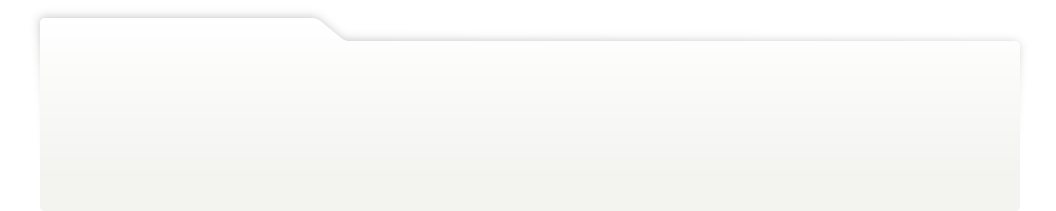
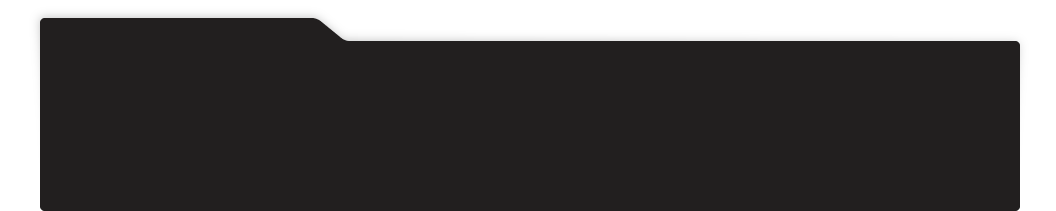
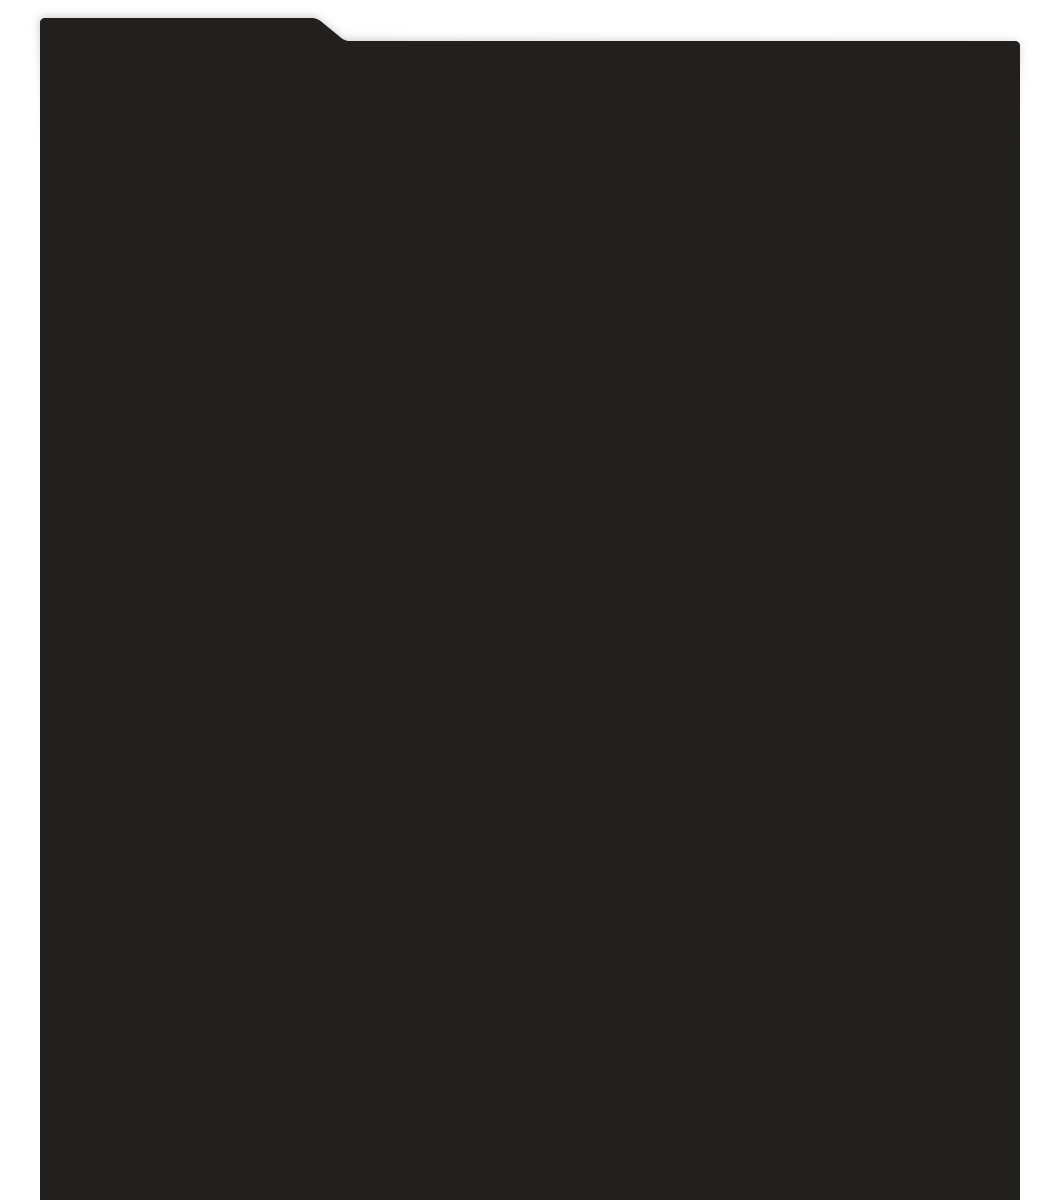
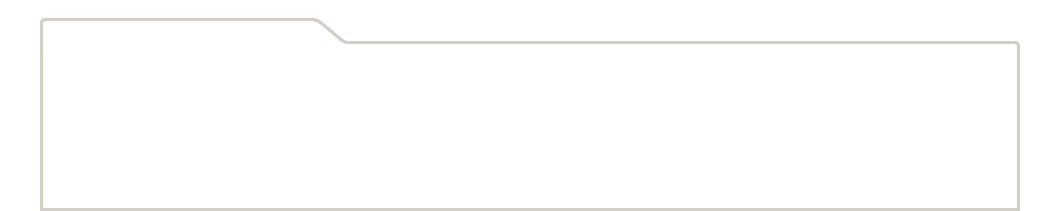
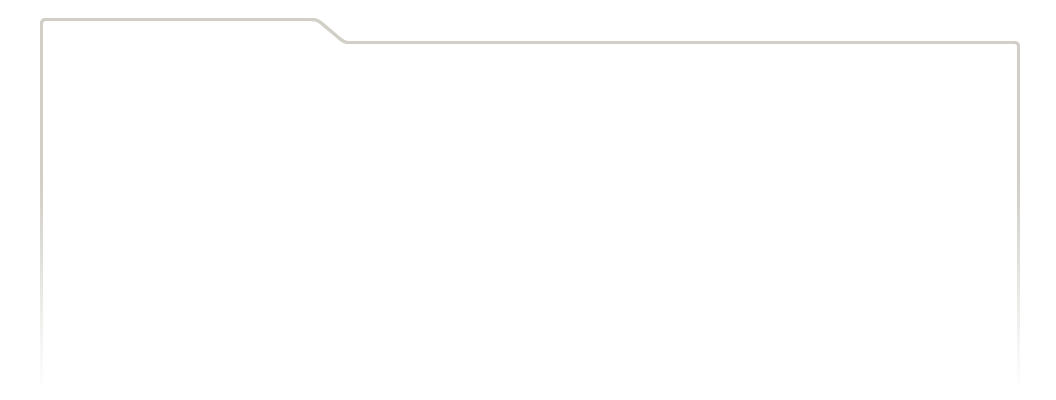
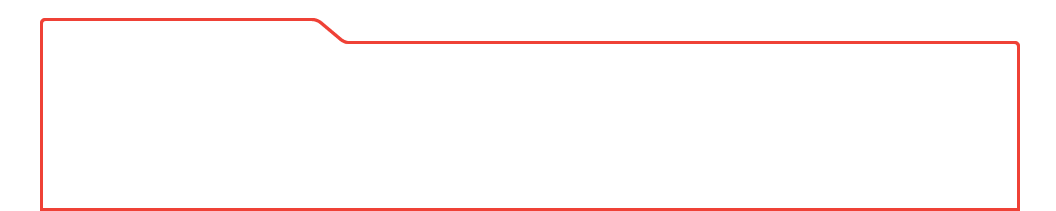
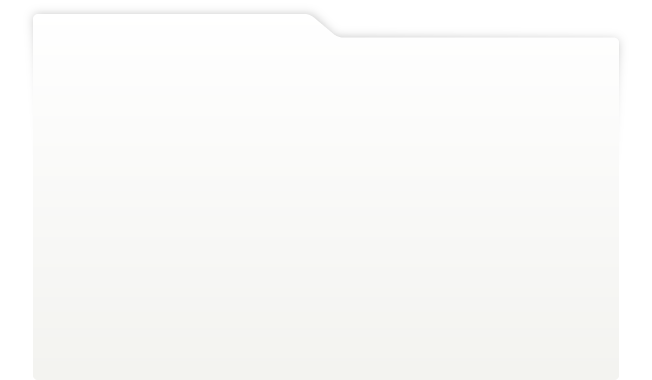
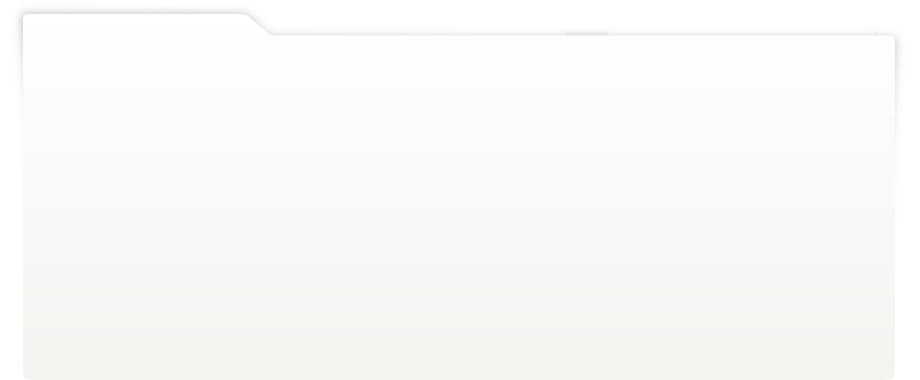
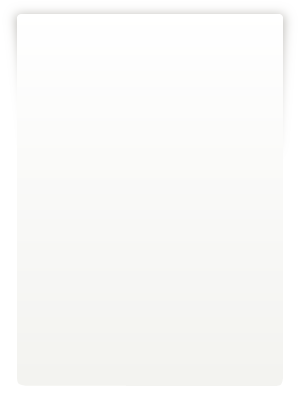
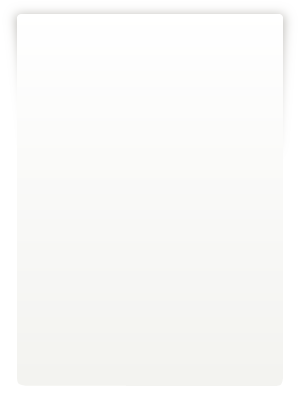
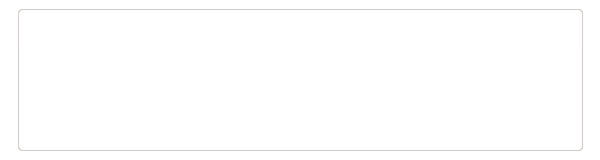
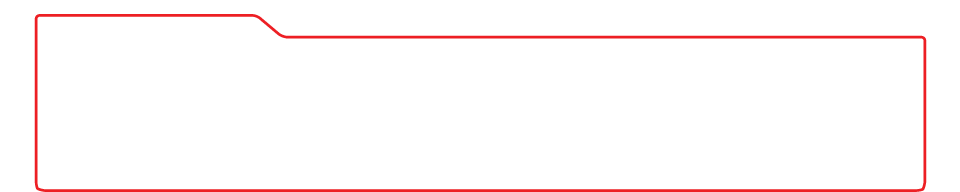
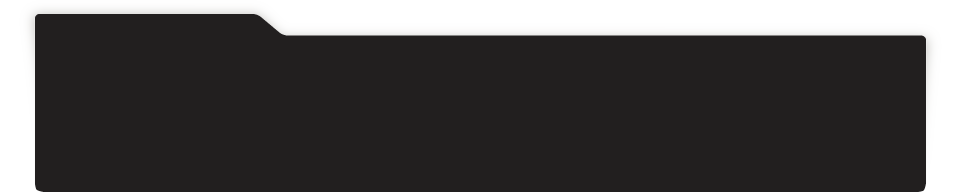
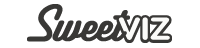
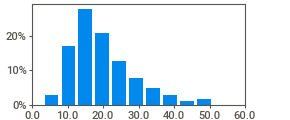
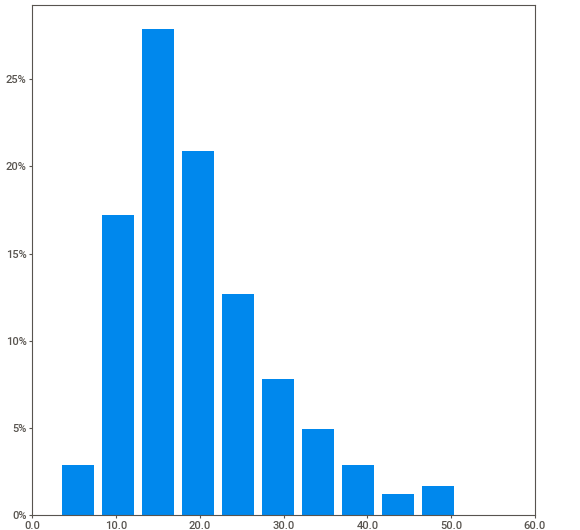
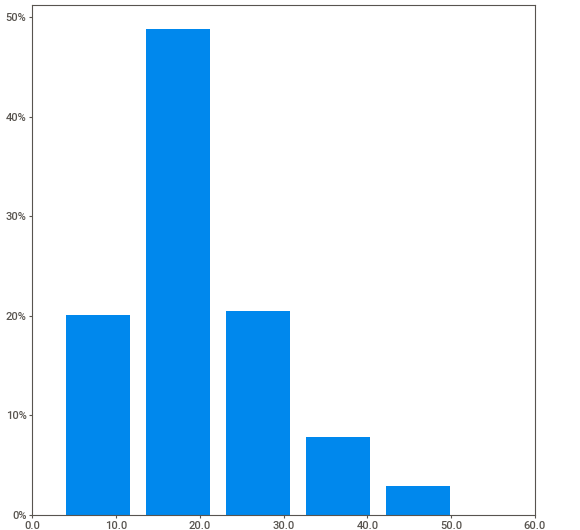
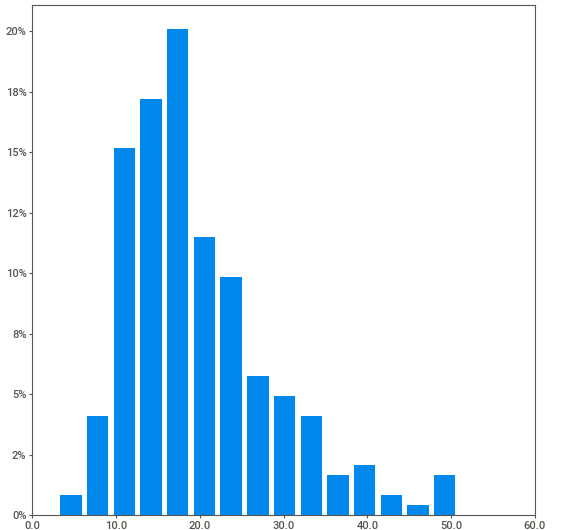
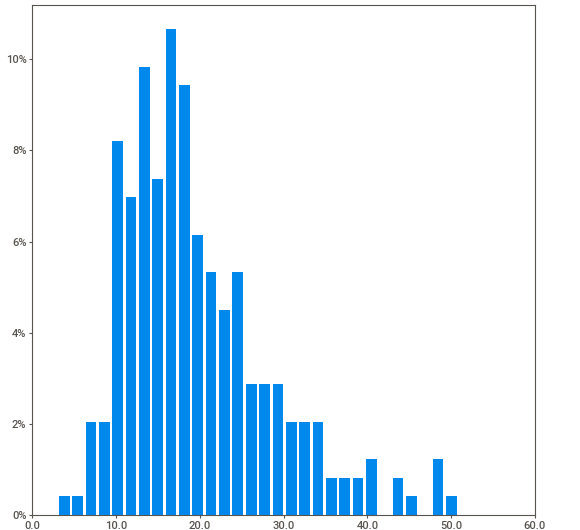
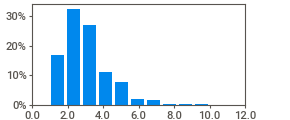
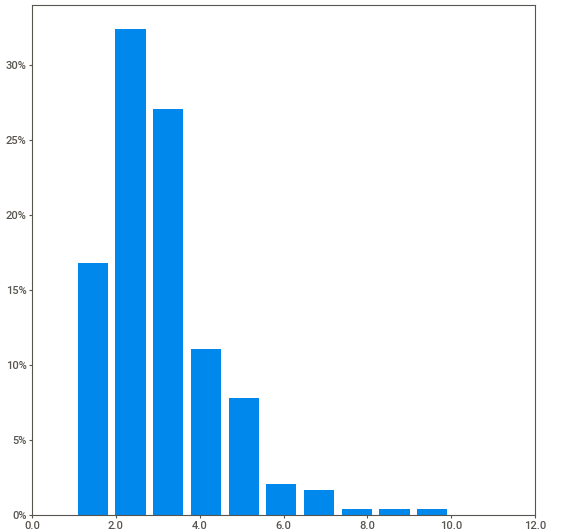
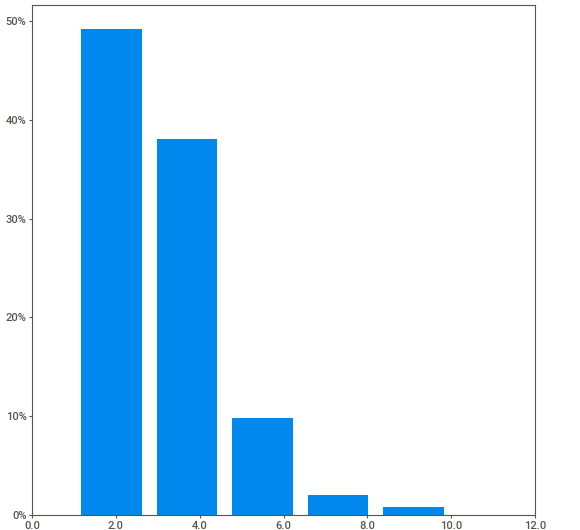
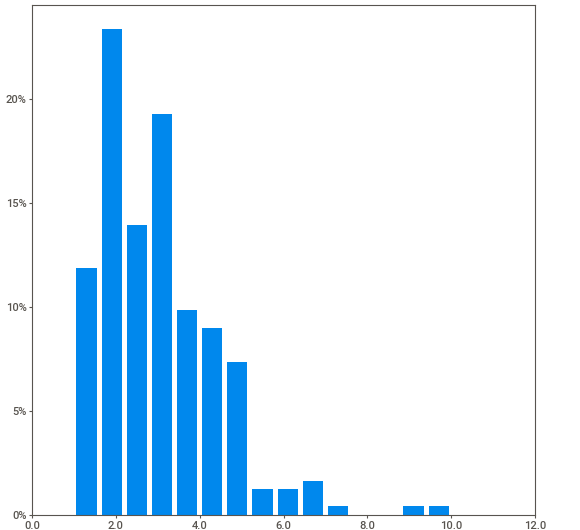
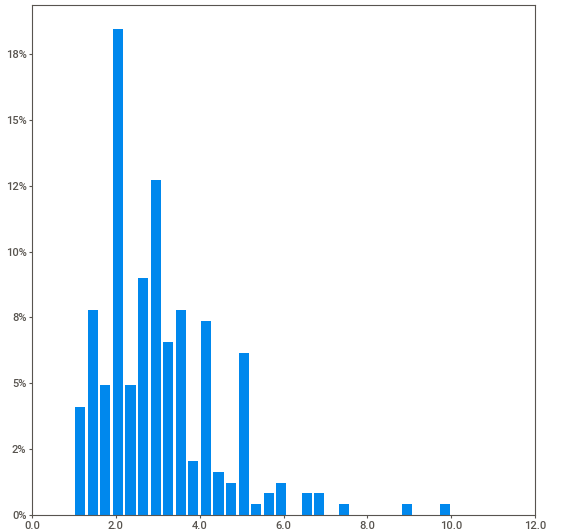
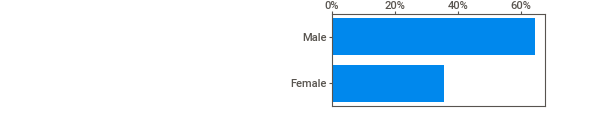
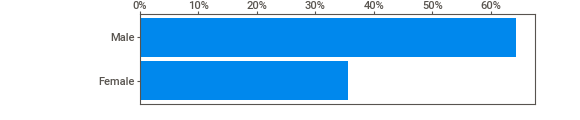
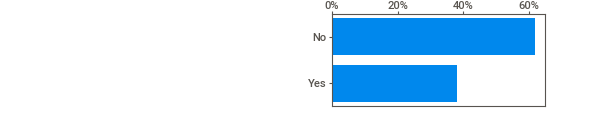
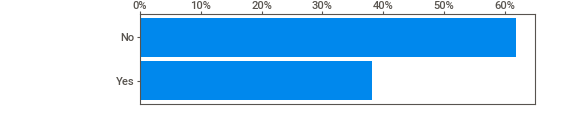
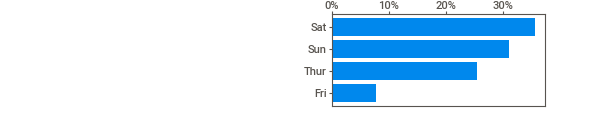
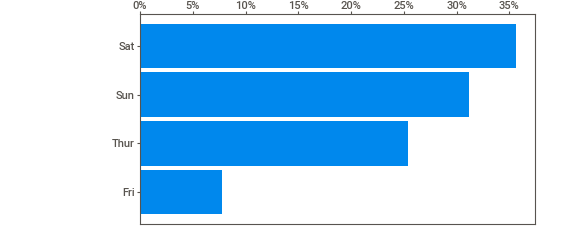
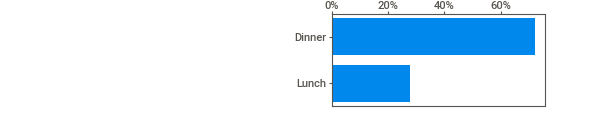
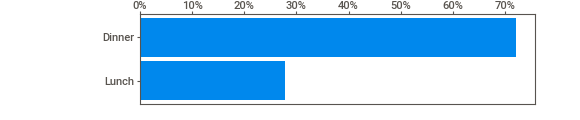
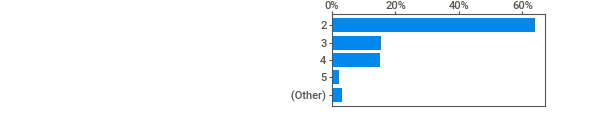
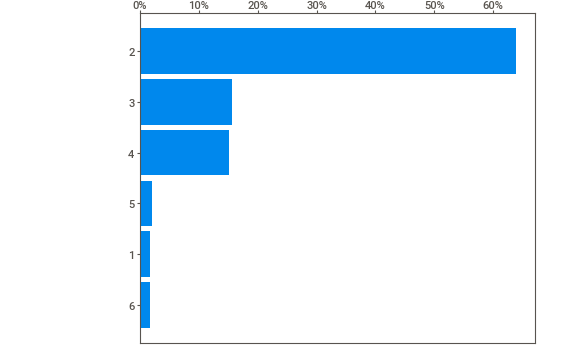
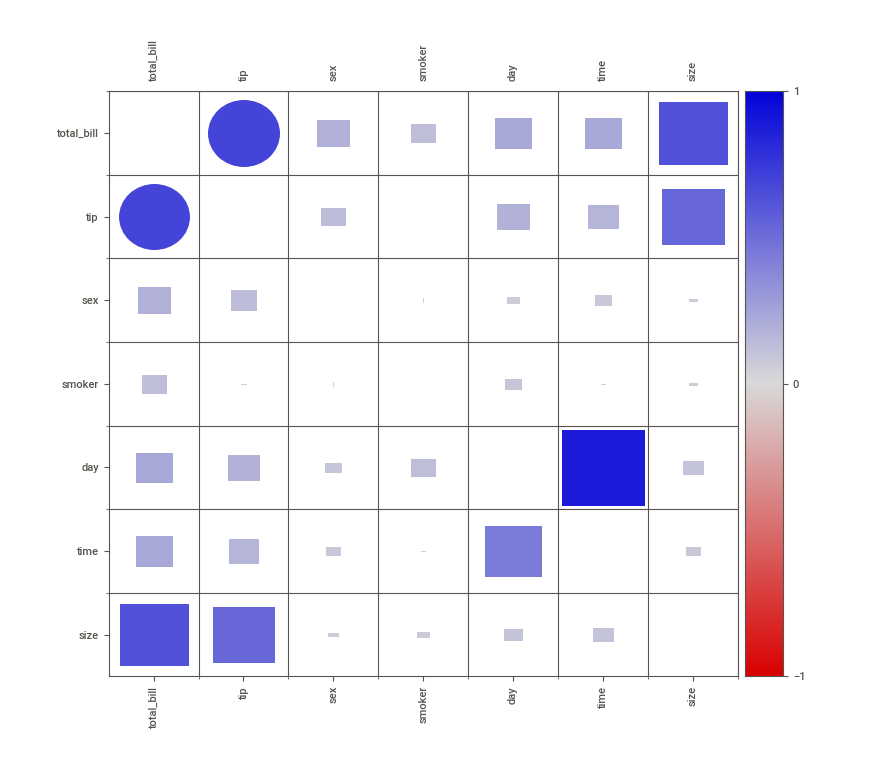
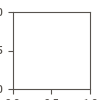

Report './drive/MyDrive/BNSP/practice1.html' was saved to storage.


In [ ]:
# Visual Python: Data Analysis > Sweetviz
report = sweetviz.analyze([tips, 'trial'])
report.show_notebook(filepath='./drive/MyDrive/BNSP/practice1.html')
report